Recurrent neural network (RNN) modelling is a machine learning algorithm which is used for sequential datasets. In comparison to feed forwarad neural networks, and RNN considers the current input, as well as previous inputs.

The SimpleRNN layer is a type of recurrent neural network (RNN) layer that can be used for sequence modeling tasks. It takes a sequence of input data as input and produces a sequence of output data. The 64 parameter specifies the number of hidden units or neurons in the layer.

A Dense layer is a fully connected neural network layer in which each neuron is connected to every neuron in the previous layer. This type of layer is commonly used in neural network models for tasks such as classification and regression.

The 1 parameter in Dense(1) specifies the number of output units in the layer. In this case, the layer has only one output unit. This indicates that the model is performing a binary classification task or a regression task where the output is a single value.

An optimizer is an algorithm that is used to update the parameters of a neural network during the training process. The Adam optimizer is a popular optimization algorithm that is commonly used in deep learning. It is an adaptive learning rate optimization algorithm that is well-suited for large datasets and complex models.

$$
m_t = B_1 m_{t-1}+ (1 - \beta_1) \frac {\delta L} {\delta\omega_t} 
$$
$$
vt = B_2 v_{t-1}+ (1 - \beta_2)  \frac {\delta L} {\delta\omega_t}^2
$$
$\beta_1$ and $\beta_2$  the decay rate

The lr parameter in Adam(lr=learning_rate) specifies the learning rate of the optimizer. The learning rate determines how much the parameters of the model are updated during each training step. A high learning rate can result in the model overshooting the optimal values for the parameters, while a low learning rate can result in slow convergence and a longer training time.

By setting the learning rate to a value specified by the variable learning_rate, the code allows for easy tuning of the learning rate without having to change the optimizer code itself. This can be useful for finding the optimal learning rate for a given model and dataset.

Here's a breakdown of the different parameters used in the fit() function:

<li>X_train_dict[col]: This parameter specifies the input data for the training set, where col is a variable that refers to a particular column or feature in the data.

<li>y_train_dict[col]: This parameter specifies the corresponding output labels for the training set.

<li>epochs: This parameter specifies the number of times the model will iterate over the entire training dataset. One epoch is defined as one pass through the entire dataset.

<li>batch_size: This parameter specifies the number of samples that will be processed by the model at once. In this case, the batch size is set to 64.

<li>validation_data: This parameter specifies the validation set, which is used to evaluate the performance of the model during training. The validation set is typically used to monitor the model's generalization performance and detect overfitting. The validation set is provided as a tuple containing the input data and corresponding output labels for the validation set.

The fit() function will train the model using the specified training data and hyperparameters, and will evaluate the performance of the model on the validation set after each epoch. The training will continue for the specified number of epochs, and at the end of each epoch, the model will output the training and validation loss values.

When using a simple RNN for time-series forecasting, the network learns from the sequential nature of the data, where the previous time steps are used as inputs to predict the next time step.

The equations that run under the hood in a simple RNN for time-series forecasting of inflation data can be described as follows:

x(t) = input at time step t
h(t) = The network has a hidden state that is updated at each time step based on the current input and the previous hidden state h(t)

$$
h(t) = tanh(W_h * h(t-1) + W_x * x(t) + b')
$$

The output at time step t calculated based on the current hidden state

$$ 
y(t) = W_y * h(t) + b  
$$

The loss function is defined to measure the difference between the predicted output and the actual output at each time step. 

$$
Loss (MSE) = (1/n) * sum((y(t) - y_{true}(t))^2)
$$

$W_h, W_x, W_y$ are weight matrices, b and b' are bias vectors

**The Limitations of Simple RNNs**

Basic RNNs often struggle when processing long input sequences

<li>Mathematically difficult for RNNs to capture long-term dependencies over many time step

<li>Problem for time series, where sequences are often hundreds of steps or more

<li>Long short-term memory networks (LSTMs) can mitigate these issues with a better memory system

![Picture title](image-20230313-233146.png)


![Picture title](image-20230313-233307.png)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

In [47]:
dataGreaterthan2003 = pd.read_csv('dataGreaterthan2003_20230313.csv')
dataGreaterthan2003['Unnamed: 0'] = pd.to_datetime(dataGreaterthan2003['Unnamed: 0'])
dataGreaterthan2003.set_index('Unnamed: 0', inplace=True)

In [48]:
dataGreaterthan2003

,Official Core Consumer Price Index,Energy Price Index,Food Price Index,Headline Consumer Price Index,Producer Price Index,Petrol,Diesel
Unnamed: 0,,,,,,,
2003-01-01,0.107892,-0.290909,0.074376,0.144494,0.022761,-1.279750,-1.325488
2003-02-01,0.111888,-0.254545,0.084564,0.148480,0.031588,-1.265934,-1.312639
2003-03-01,0.115884,-0.254545,0.090678,0.154459,0.035223,-1.265934,-1.312639
2003-04-01,0.121878,-0.272727,0.094753,0.162431,0.022761,-1.317835,-1.360432
2003-05-01,0.123876,-0.309091,0.102904,0.162431,0.017395,-1.315012,-1.351306
...,...,...,...,...,...,...,...
2022-08-01,0.879121,1.018182,1.087112,1.059292,1.310688,1.272001,1.467847
2022-09-01,0.891109,1.054545,1.113602,1.069258,1.337170,1.058409,1.348984
2022-10-01,0.905095,1.200000,1.162506,1.109118,1.337170,0.978122,1.317154


## Univariate Forecasting

### train and test split

In [49]:
test_size = 12

#test sets
rnnTestDF = dataGreaterthan2003.tail(12)

# train sets
# get the number of rows in the dataframe
num_rows = dataGreaterthan2003.shape[0]

# get all rows except the last 12 rows
rnnTrainDF = dataGreaterthan2003.iloc[:num_rows-12, :]

In [50]:
def segregate_train_test_data(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

### model definition

In [51]:
# Define a function to create the model
def create_rnn_model_hyperparameters(col, learning_rate, epochs):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=(X_train_dict[col].shape[1], X_train_dict[col].shape[2])))
    model.add(Dense(1))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    model.fit(X_train_dict[col], y_train_dict[col], epochs=epochs, batch_size=64, validation_data=(X_test_dict[col], y_test_dict[col]))
    test_loss  = model.evaluate(X_test_dict[col], y_test_dict[col])
    return test_loss

### reshape input data

In [52]:
X_train_dict = {}
y_train_dict = {}
X_test_dict = {}
y_test_dict = {}
window = 3
for col in rnnTrainDF.columns:
    X_train_dict[col], y_train_dict[col] = segregate_train_test_data(data=rnnTrainDF[col], window_size=window)
    X_test_dict[col], y_test_dict[col] = segregate_train_test_data(data=rnnTestDF[col], window_size=window)
    X_train_dict[col] = np.reshape(X_train_dict[col], (X_train_dict[col].shape[0], X_train_dict[col].shape[1], 1))
    X_test_dict[col] = np.reshape(X_test_dict[col], (X_test_dict[col].shape[0], X_test_dict[col].shape[1], 1))

### hyperparameter tuning

In [8]:
# Define a list of hyperparameters to tune

epochs = [50, 100, 150]
learning_rate = [0.001, 0.01, 0.1]

# Perform grid search for hyperparameter tuning
results = []

for col in rnnTrainDF.columns:
    for lr in learning_rate:
        for epoch in epochs:
            loss = create_rnn_model_hyperparameters(col, lr, epoch)
            results.append({'index': col, 'learning_rate': lr,'epochs': epoch, 'loss': loss})

# Convert results to a DataFrame
results = pd.DataFrame(results)

Epoch 54/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0056 - val_loss: 0.0342
Epoch 55/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0380
Epoch 56/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0319
Epoch 57/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0061 - val_loss: 0.0325
Epoch 58/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0383
Epoch 59/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0353
Epoch 60/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0057 - val_loss: 0.0312
Epoch 61/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.0432
Epoch 62/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 0.0305
Epoch 63/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.0381
Epoch 64/100
4/4

In [9]:
# Group by 'group' column and find minimum value of 'value' column
min_values = results.groupby('index')['loss'].min()

# Filter original dataframe to only retain rows with minimum value for each group
result = results[results['loss'].isin(min_values)]

# Output result
result.set_index('index', inplace=True)
result

,learning_rate,epochs,loss
index,,,
Official Core Consumer Price Index,0.010,50,0.001052
Energy Price Index,0.010,100,0.015164
Food Price Index,0.010,100,0.006853
Headline Consumer Price Index,0.100,100,0.000903
Producer Price Index,0.010,50,0.007613
Petrol,0.001,50,0.041503
Diesel,0.001,100,0.029735


In [58]:
# result.to_csv('rnnHyperParameters.csv', index = True)
result = pd.read_csv('rnnHyperParameters.csv').set_index('index')

In [59]:
result_dict = result.to_dict(orient='index')
result

,learning_rate,epochs,loss
index,,,
Official Core Consumer Price Index,0.100,50,0.000309
Energy Price Index,0.010,100,0.013383
Food Price Index,0.010,150,0.006364
Headline Consumer Price Index,0.001,100,0.002154
Producer Price Index,0.010,150,0.007196
Petrol,0.001,150,0.038774
Diesel,0.001,100,0.030592


In [60]:
X_dict = {}
y_dict = {}

for col in rnnTrainDF.columns:
    X_dict[col], y_dict[col] = segregate_train_test_data(data=rnnTrainDF[col], window_size=3)
    X_dict[col] = np.reshape(X_dict[col], (X_dict[col].shape[0], X_dict[col].shape[1], 1))   

### model implementation

In [61]:
# Define a function to create the model
def create_rnn_model_implementation(col, learning_rate, epochs):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=(X_train_dict[col].shape[1], X_train_dict[col].shape[2])))
    model.add(Dense(1))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    model.fit(X_train_dict[col], y_train_dict[col], epochs=epochs, batch_size=64, validation_data=(X_test_dict[col], y_test_dict[col]))
    return model

In [62]:
result = {}
rnn_aic_dict = {}
rnn_bic_dict = {}

for col in rnnTrainDF.columns:
    learning_rate = result_dict[col]['learning_rate']
    epochs = result_dict[col]['epochs']
    model = create_rnn_model_implementation(col= col,learning_rate=learning_rate,epochs=epochs)
    predictions = model.predict(X_test_dict[col])
    result[col] = predictions.reshape(-1)

    rnn_residuals = y_test_dict[col][:9] - result[col]
    rnn_model_params = model.count_params()
    rnn_model_loglik = -0.5 * len(rnn_residuals) * np.log(np.mean(np.square(rnn_residuals))) - 0.5 * rnn_model_params
    rnn_aic_dict[col] = -2 * rnn_model_loglik + 2 * rnn_model_params

    rnn_mse = mean_squared_error(y_test_dict[col][:9], result[col])
    rnn_bic_dict[col] = np.log(len(y_test_dict[col][:9])) * len(model.trainable_weights) - 2 * np.log(rnn_mse)

4/4 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 1.4786e-04
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0061
Epoch 9/100
4/4 [==============================] - 0s 18ms/step - loss: 4.6297e-04 - val_loss: 0.0175
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0114
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 2.7487e-04 - val_loss: 0.0030
Epoch 12/100
4/4 [==============================] - 0s 17ms/step - loss: 3.9820e-04 - val_loss: 0.0021
Epoch 13/100
4/4 [==============================] - 0s 6ms/step - loss: 2.4647e-04 - val_loss: 0.0056
Epoch 14/100
4/4 [==============================] - 0s 6ms/step - loss: 1.6523e-04 - val_loss: 0.0080
Epoch 15/100
4/4 [==============================] - 0s 20ms/step - loss: 1.8376e-04 - val_loss: 0.0048
Epoc

In [63]:
rnnResultDFIndex = rnnTestDF.index[:(rnnTestDF.shape[0] - window)]
rnnResultDF = pd.DataFrame(result, index = rnnResultDFIndex)
rnnTrainDF.columns = [col + ' Train' for col in rnnTrainDF.columns]
rnnTestDF.columns = [col + ' Test' for col in rnnTestDF.columns]
rnnResultDF.columns = [col + ' Prediction' for col in rnnResultDF.columns]

### calculating metrics

In [64]:
# Calculate MSE

# create an empty dataframe to store the MSE results
rnn_mse_dict = {}
rnn_mae_dict = {}

# loop through each column in dataframe
for col in dataGreaterthan2003.columns:
    # calculate the MSE for the current column using NumPy's `mean` and `square` functions
    mse = np.mean(np.square(rnnTestDF[f"{col} Test"].head(9) - rnnResultDF[f"{col} Prediction"]))
    mae = mean_absolute_error(rnnTestDF[f"{col} Test"].head(9), rnnResultDF[f"{col} Prediction"])
    # add the MSE result for the current column to the `mse_df` dataframe
    rnn_mse_dict[col] = mse
    rnn_mae_dict[col] = mae

In [65]:
# Combine the dictionaries into a list
rnn_metrics_dict_list = [rnn_mse_dict, rnn_mae_dict, rnn_aic_dict, rnn_bic_dict]

# Convert the list of dictionaries to a dataframe
metricsDf = pd.DataFrame(rnn_metrics_dict_list, index=[rnn_mse_dict, rnn_mae_dict, rnn_aic_dict, rnn_bic_dict])

# Transpose the dataframe to have the keys as index
metricsDf = metricsDf.T

# Rename the columns
metricsDf.columns = ['mse', 'mae', 'aic', 'bic']

metricsDf.to_csv('metrics_rnn.csv', index = True)

metricsDf

,mse,mae,aic,bic
Official Core Consumer Price Index,0.000965,0.029416,12817.827720,21.913296
Energy Price Index,0.035220,0.139950,12835.064728,18.082850
Food Price Index,0.000311,0.012906,12827.207589,19.828881
Headline Consumer Price Index,0.000199,0.009902,12814.956478,22.551350
Producer Price Index,0.002443,0.041622,12824.861701,20.350189
Petrol,0.042213,0.181015,12839.960119,16.994985
Diesel,0.030770,0.142430,12836.907645,17.673313


### Evaluating model

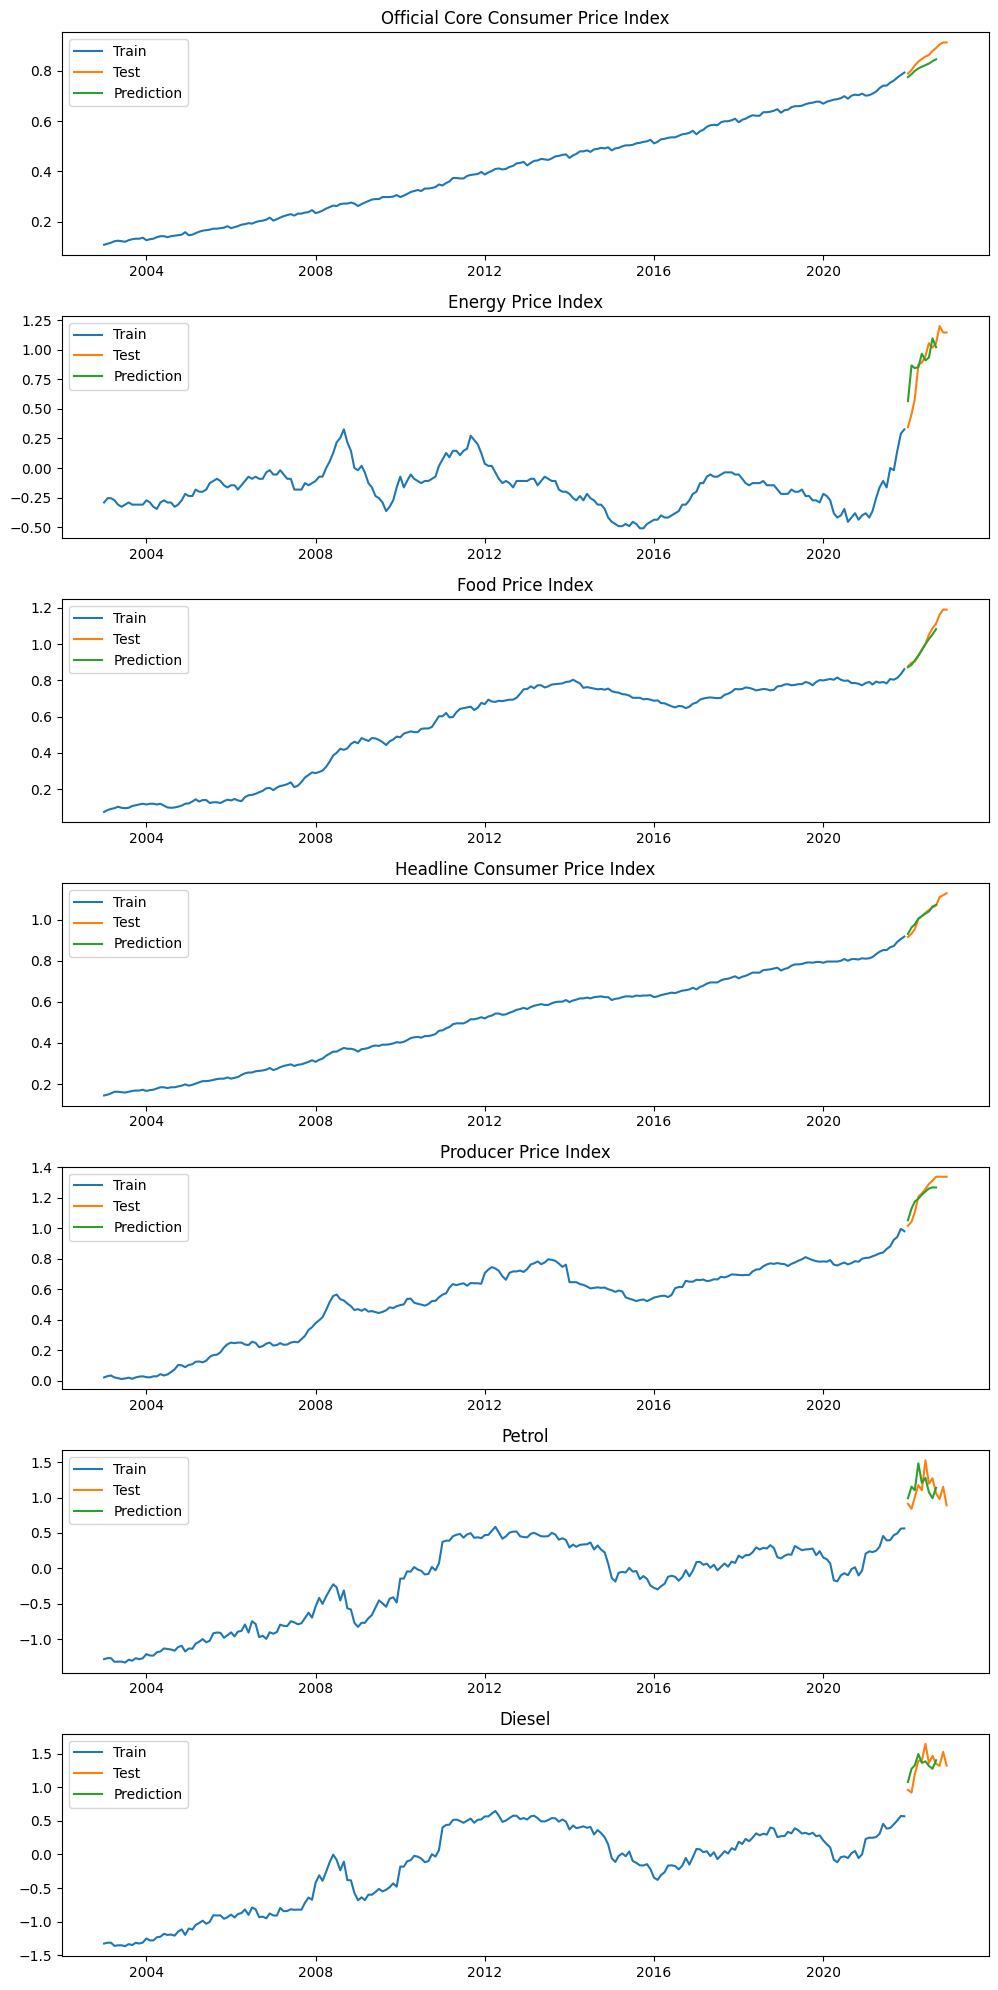

In [66]:
# merge the three dataframes on the index
merged_df = pd.concat([rnnTrainDF, rnnTestDF,rnnResultDF],axis=1)
merged_df
# plot the train, test, and prediction values


fig,axes = plt.subplots(7,1,figsize=(10,20),)

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(merged_df.index, merged_df[f"{col} Train"], label='Train')
    axes[i].plot(merged_df.index, merged_df[f"{col} Test"], label='Test')
    axes[i].plot(merged_df.index, merged_df[f"{col} Prediction"], label='Prediction')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

### future prediction

In [67]:
future_dates = pd.date_range('2022-11-01', '2027-11-01', freq='MS')
prediction_result = pd.DataFrame(index=future_dates)

for col in dataGreaterthan2003.columns:

    # make predictions for future values
    
    future_values = []
    last_data = dataGreaterthan2003[[col]].tail(3)

    learning_rate = result_dict[col]['learning_rate']
    epochs = result_dict[col]['epochs']
    model = create_rnn_model_implementation(col= col,learning_rate=learning_rate,epochs=epochs)
    predictions = model.predict(X_test_dict[col])

    for i in range(len(future_dates)):
        X = np.expand_dims(last_data, axis=0)
        y_pred = model.predict(X)[0][0]
        future_values.append(y_pred)
        last_data = np.vstack((last_data[1:], [y_pred]))

    prediction_result[col] = future_values

1/1 [==============================] - 0s 28ms/step
Epoch 1/150
4/4 [==============================] - 1s 78ms/step - loss: 0.2427 - val_loss: 0.3266
Epoch 2/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0749 - val_loss: 0.1054
Epoch 3/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0174 - val_loss: 0.0130
Epoch 4/150
4/4 [==============================] - 0s 17ms/step - loss: 0.0155 - val_loss: 0.1241
Epoch 5/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0177 - val_loss: 0.1250
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0076
Epoch 7/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0180
Epoch 8/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0907
Epoch 9/150
4/4 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0687
Epoch 10/150
4/4 [==============================] - 0s 8ms/step - los

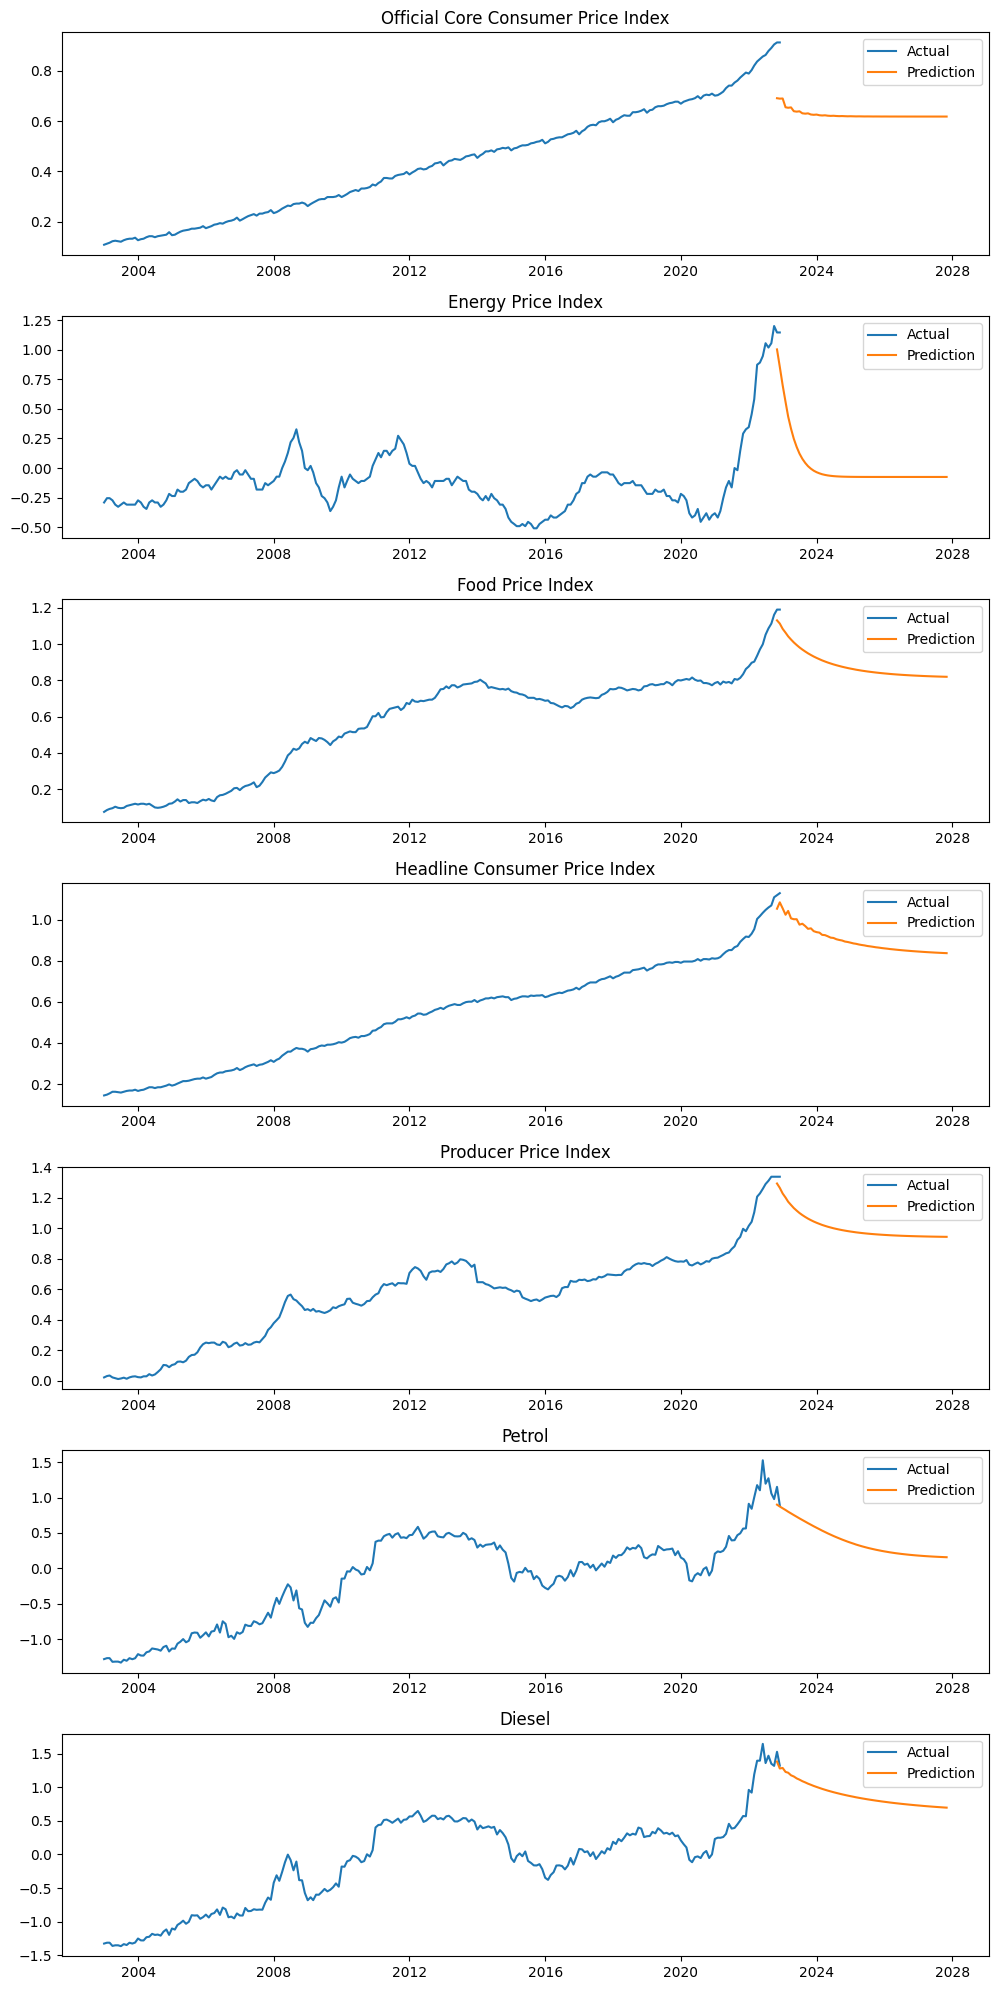

In [68]:
fig,axes = plt.subplots(7,1,figsize=(10,20),)

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(dataGreaterthan2003.index, dataGreaterthan2003[col], label='Actual')
    axes[i].plot(prediction_result.index, prediction_result[col], label='Prediction')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

## Multivariate Forecasting

### filtering principal components

In [69]:
principal_data = dataGreaterthan2003[['Producer Price Index', 'Energy Price Index', 'Official Core Consumer Price Index', 'Food Price Index','Petrol','Diesel']]

In [70]:
input_cols = ['Producer Price Index', 'Energy Price Index', 'Official Core Consumer Price Index', 'Food Price Index']
output_cols = ['Petrol','Diesel']
X = principal_data[input_cols].values
Y = principal_data[output_cols].values

### train and test split

In [71]:
X_train, Y_train = X[:num_rows-12, :], Y[:num_rows-12, :]
X_test, Y_test = X[num_rows-12:, :], Y[num_rows-12:, :]

### reshape input data

In [72]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

### model definition

In [73]:
# Define a function to create the model
def create_rnn_model_hyperparameter(learning_rate, epochs):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(Y_train.shape[1]))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=64, validation_data=(X_test, Y_test))
    test_loss  = model.evaluate(X_test, Y_test)
    return test_loss

### hyperparameter tuning

In [26]:
# Define a list of hyperparameters to tune

epochs = [50, 100, 150, 200]
learning_rate = [0.001, 0.01, 0.1]

# Perform grid search for hyperparameter tuning
results = []

for lr in learning_rate:
    for epoch in epochs:
        loss = create_rnn_model_hyperparameter(lr, epoch)
        results.append({'learning_rate': lr,'epochs': epoch, 'loss': loss})

# Convert results to a DataFrame
result = pd.DataFrame(results)

4/4 [==============================] - 0s 17ms/step - loss: 0.3987 - val_loss: 2.2333
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2222 - val_loss: 1.0716
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1300 - val_loss: 0.8589
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0813 - val_loss: 0.3415
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0471 - val_loss: 0.1151
Epoch 8/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0478 - val_loss: 0.1610
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0407 - val_loss: 0.0767
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0423 - val_loss: 0.0480
Epoch 11/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0383 - val_loss: 0.0725
Epoch 12/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0330 - val_loss: 0.0483
Epoch 13/50
4/4 [============================

In [74]:
# result.to_csv('rnnMultivariateHyperParameters.csv')
result = pd.read_csv('rnnMultivariateHyperParameters.csv')

In [75]:
# find minimum value of 'loss' column
min_values = result['loss'].min()

# Filter original dataframe to only retain rows with minimum value for each group
result = result[result['loss'] == (min_values)]

result

,Unnamed: 0,learning_rate,epochs,loss
5,5,0.01,100,0.052268


### model implementation

In [76]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(Y_train.shape[1]))
optimizer = Adam(lr=result.iloc[0]['learning_rate'])
model.compile(loss='mse', optimizer=optimizer)
history = model.fit(X_train, Y_train, epochs=int(result.iloc[0]['epochs']), batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
4/4 [==============================] - 1s 67ms/step - loss: 0.3659 - val_loss: 0.4056
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1958 - val_loss: 0.1628
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0826 - val_loss: 0.0770
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0595 - val_loss: 0.2241
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0442 - val_loss: 0.6010
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.5843
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0380 - val_loss: 0.5309
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.2607
Epoch 9/100
4

In [77]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 103ms/step


### Loss curve

In [78]:
# model.save('rnnModel.h5')

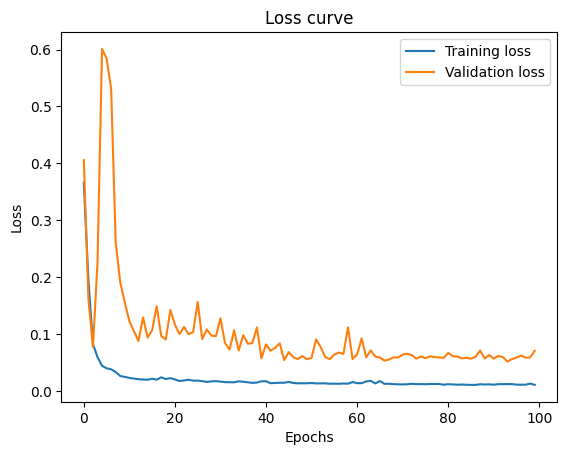

In [79]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluating model

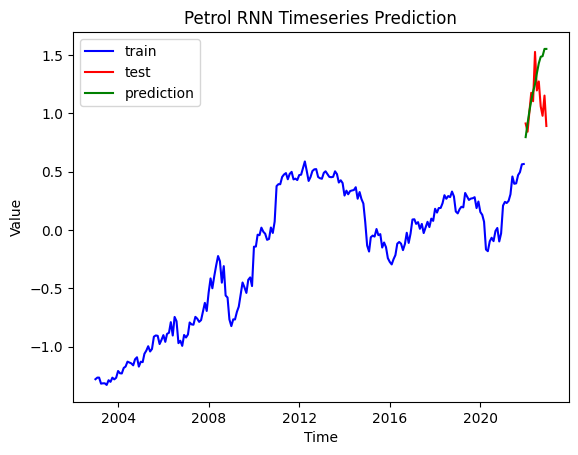

In [80]:
plt.plot(rnnTrainDF.index, Y_train[:, 0], color='blue', label='train')
plt.plot(rnnTestDF.index, Y_test[:, 0], color='red', label='test')
plt.plot(rnnTestDF.index, y_pred[:, 0], color='green', label='prediction')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Petrol RNN Timeseries Prediction')
plt.legend()

plt.show()

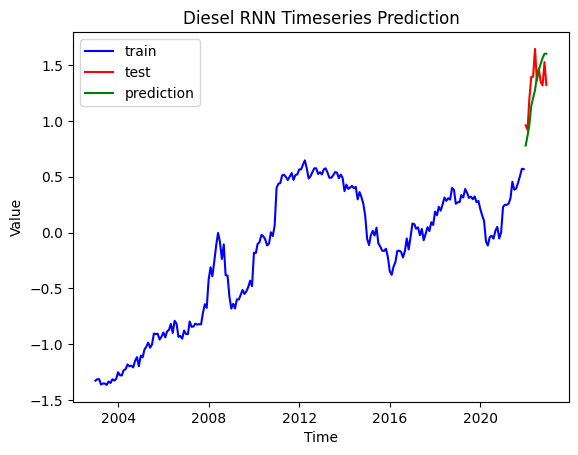

In [81]:
plt.plot(rnnTrainDF.index, Y_train[:, 1], color='blue', label='train')
plt.plot(rnnTestDF.index, Y_test[:, 1], color='red', label='test')
plt.plot(rnnTestDF.index, y_pred[:, 1], color='green', label='prediction')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Diesel RNN Timeseries Prediction')
plt.legend()

plt.show()

### future prediction

In [82]:
X_test = prediction_result[input_cols].values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [83]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


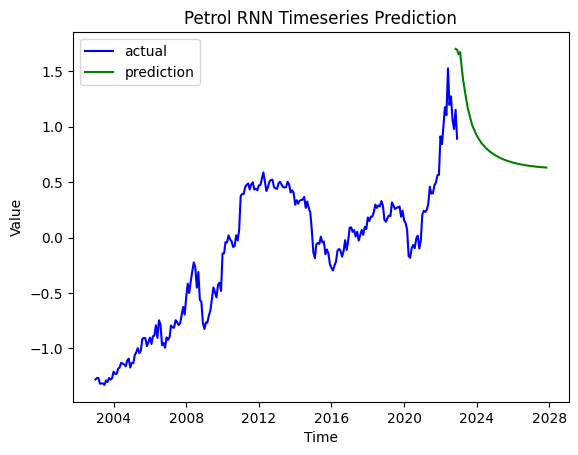

In [84]:
plt.plot(dataGreaterthan2003.index, dataGreaterthan2003['Petrol'], color='blue', label='actual')
plt.plot(prediction_result.index, y_pred[:, 0], color='green', label='prediction')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Petrol RNN Timeseries Prediction')
plt.legend()

plt.show()

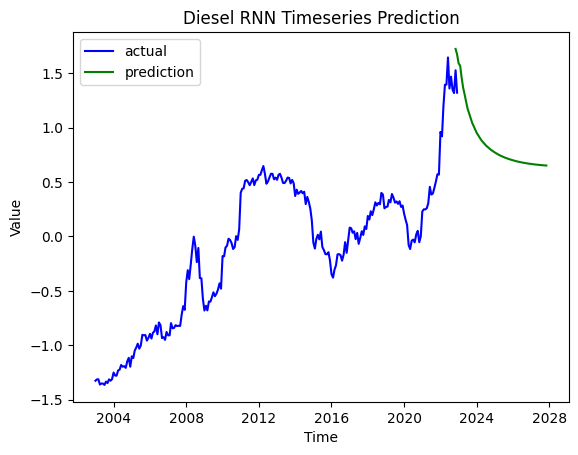

In [85]:
plt.plot(dataGreaterthan2003.index, dataGreaterthan2003['Diesel'], color='blue', label='actual')
plt.plot(prediction_result.index, y_pred[:, 1], color='green', label='prediction')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Diesel RNN Timeseries Prediction')
plt.legend()

plt.show()

In [86]:
multi_prediction = pd.DataFrame(y_pred, index = prediction_result.index)
multi_prediction.columns = output_cols

In [87]:
multi_prediction.to_csv('multivariate_future_prediction_rnn.csv', index=True)

<AxesSubplot: >

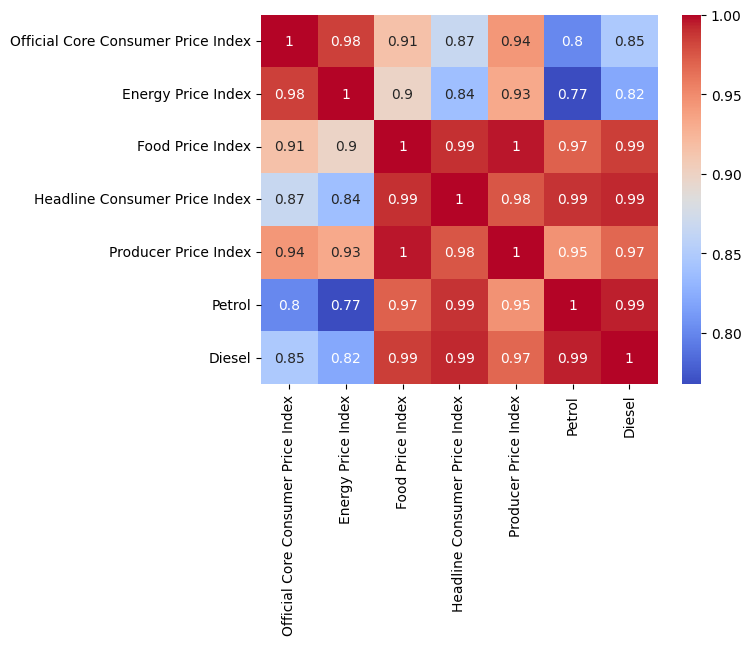

In [89]:
sns.heatmap(prediction_result.corr(), cmap='coolwarm', annot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=638889fe-2546-41ac-8d2f-f9d8b29d307c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>